In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("cars.csv")

In [3]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [4]:
df.shape

(205, 15)

#### There are 205 instances with 15 attributes/features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


##### It shows that there are no mising value but we can see in normalized losses a "?" symbol appears this means that the data need to be cleaned first

In [6]:
df["normalized-losses"].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [7]:
df["normalized-losses"].replace("?",np.nan,inplace=True)

In [8]:
df["normalized-losses"].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [9]:
for i in df.columns:
    print(i)
    print(df[i].unique())

symboling
[ 3  1  2  0 -1 -2]
normalized-losses
[nan '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type
['gas' 'diesel']
body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels
['rwd' 'fwd' '4wd']
engine-location
['front' 'rear']
width
[64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9 60.3 63.6 63.8 64.6
 63.9 64.  65.2 62.5 66.  61.8 69.6 70.6 64.2 65.7 66.5 66.1 70.3 71.7
 70.5 72.  68.  64.4 65.4 68.4 68.3 65.  72.3 66.6 63.4 65.6 67.7 67.2
 68.9 68.8]
height
[48.8 52.4 54.3 53.1 55.7 55.9 

In [10]:
df["horsepower"].replace("?",np.nan,inplace=True)

In [11]:
for i in df.columns:
    for j in df[i]:
        if j=="missing":
            print("Yes")
        else:
            continue
             


In [12]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

##### To handle mssing values we have an proportion approach:
    if missing values<3%:
        then use dropna and drop those rows
        
    if missing values are between 3-40%:
        fill by mean
        
    if missing value >40%:
        drop thae particular column

In [13]:
#Calculating Percentage
df2=pd.DataFrame(df.isnull().sum()/df.shape[0]*100,columns=["m.v%"])
df2

,m.v%
symboling,0.00000
normalized-losses,20.00000
make,0.00000
fuel-type,0.00000
body-style,0.00000
drive-wheels,0.00000
engine-location,0.00000
width,0.00000
height,0.00000
engine-type,0.00000


### Visualizing proportion of null value

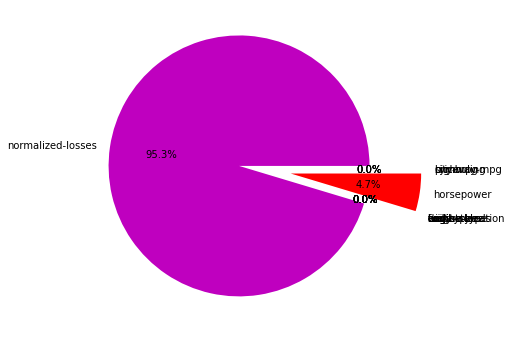

In [14]:
# col='b' as blue

# 'g' as green

# 'r' as red

# 'c' as cyan

# 'm' as magenta

# 'y' as yellow

# 'k' as black

# 'w' as white
col=["g","m","r","c","b","y","k","aquamarine","mediumseagreen"]

plt.figure(figsize=(6,6))
plt.pie(df2.values.squeeze(),labels=df2.index,colors=col,autopct="%1.1f%%",explode=np.full(15,0.2))
plt.show()

In [15]:
df.dropna(axis=0,subset="horsepower",inplace=True)

In [16]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,NaN,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [17]:
df["normalized-losses"]=df["normalized-losses"].astype("float64")
df["horsepower"]=df["horsepower"].astype("float64")

In [18]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy="mean")
df[["normalized-losses"]]=si.fit_transform(df[["normalized-losses"]])

In [19]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [20]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    int64  
 1   normalized-losses  203 non-null    float64
 2   make               203 non-null    object 
 3   fuel-type          203 non-null    object 
 4   body-style         203 non-null    object 
 5   drive-wheels       203 non-null    object 
 6   engine-location    203 non-null    object 
 7   width              203 non-null    float64
 8   height             203 non-null    float64
 9   engine-type        203 non-null    object 
 10  engine-size        203 non-null    int64  
 11  horsepower         203 non-null    float64
 12  city-mpg           203 non-null    int64  
 13  highway-mpg        203 non-null    int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 23.8+ KB


In [21]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
catcol=x.select_dtypes("object").columns
catcol
x[catcol]=oe.fit_transform(x[catcol])

In [22]:
x

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
1,3,122.0,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
2,1,122.0,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26
3,2,164.0,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30
4,2,164.0,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,20.0,1.0,3.0,2.0,0.0,68.9,55.5,3.0,141,114.0,23,28
201,-1,95.0,20.0,1.0,3.0,2.0,0.0,68.8,55.5,3.0,141,160.0,19,25
202,-1,95.0,20.0,1.0,3.0,2.0,0.0,68.9,55.5,5.0,173,134.0,18,23
203,-1,95.0,20.0,0.0,3.0,2.0,0.0,68.9,55.5,3.0,145,106.0,26,27


In [23]:
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 203, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [25]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)
ypred=linreg.predict(xtest)

In [26]:
error=-(ypred-ytest)

In [27]:
error

176     -306.744363
177      183.632298
18      4157.577621
59     -4483.273034
145     3878.638215
31      -228.805326
28     -5410.438693
40      1322.873321
67       333.291085
38     -2071.794227
172     2710.803069
44      3790.484672
154     1981.998295
94      -191.479543
4       2223.017350
149     3385.158927
173    -2043.619803
163       -3.826832
11      3419.887628
116    -1370.919506
35     -1425.096250
98       543.269154
119     1687.524169
179    -2415.292697
117      792.319334
29     -3425.241780
56      3157.371743
16     15619.438377
89     -1991.479543
51     -1764.438565
123    -3378.885665
170    -3126.239285
34     -1184.713993
27       595.548786
95       526.230549
58      6480.640999
97      1194.884256
69      2982.156488
132     -969.709476
78       181.555578
203     4696.279963
Name: price, dtype: float64

In [28]:
linreg.coef_

array([ 1.01221058e+02,  2.13624613e+00, -1.95464817e+02,  3.90735570e+01,
       -2.46290492e+02,  1.75273126e+03,  1.59630390e+04,  8.19573929e+02,
        3.86667154e+02,  8.94734898e+01,  1.03500042e+02, -1.44213906e+01,
        6.79423982e+01, -1.74504678e+02])

In [29]:
linreg.intercept_

-69916.10300165688

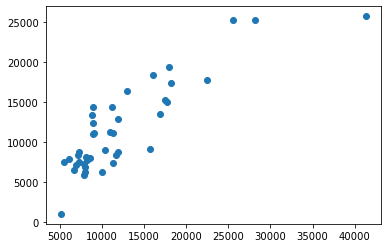

In [30]:
plt.scatter(ytest,ypred)

<AxesSubplot:xlabel='price', ylabel='Density'>

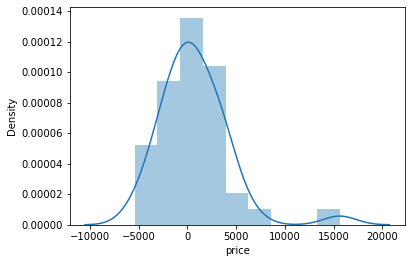

In [31]:
sns.distplot(ytest-ypred)

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)

rmse=np.sqrt(mse)

r2=r2_score(ytest,ypred)

print(f"MAE:- {mae}\n MSE:- {mse}\n RMSE:- {rmse}\n Accuracy:- {r2}")

MAE:- 2478.9409868015578
 MSE:- 12946956.193444857
 RMSE:- 3598.18790413242
 Accuracy:- 0.7362102586064485


In [33]:
train=linreg.score(xtrain,ytrain)
test=linreg.score(xtest,ytest)
print(f"Training Accuracy:{train} \nTesting ACcuracy:{test}")

Training Accuracy:0.8543896022704588 
Testing ACcuracy:0.7362102586064485


##### This is a clear case of OVERFITTING ,Since Bias is low and Variance is high 

In [34]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=10)

In [35]:
r.fit(xtrain,ytrain)
ypred1=r.predict(xtest)

In [36]:
mae=mean_absolute_error(ytest,ypred1)
mse=mean_squared_error(ytest,ypred1)

rmse=np.sqrt(mse)

r2=r2_score(ytest,ypred1)

print(f"MAE:- {mae}\nMSE:- {mse}\nRMSE:-{rmse}\nAccuracy:-{r2}")

train=r.score(xtrain,ytrain)
test=r.score(xtest,ytest)
print(f"Training Accuracy:{train} \nTesting Accuracy:{test}")

MAE:- 2444.192206612386
MSE:- 12158067.0147034
RMSE:-3486.8419830418757
Accuracy:-0.7522836019729569
Training Accuracy:0.8221689016910516 
Testing Accuracy:0.7522836019729569


In [47]:
for i in range(100,1500,50):
    l1 = Ridge(alpha=i)

    l1.fit(xtrain,ytrain)

    ypred = l1.predict(xtest)
    
    train=l1.score(xtrain,ytrain)

    test=l1.score(xtest,ytest)
    
    print(f"{i} {train}  {test}")

100 0.8005494444740262  0.7316385845451551
150 0.7971649447631045  0.7276751921601897
200 0.7948256241824666  0.7252005355967474
250 0.7930424054083957  0.7234850928602014
300 0.7916010605327729  0.7222069032192635
350 0.790389795542638  0.7212022860233643
400 0.7893434496729332  0.7203795995375262
450 0.7884209843465348  0.7196837956881272
500 0.7875950094204099  0.7190799746352793
550 0.7868463921509945  0.7185450368391524
600 0.786161264309242  0.7180631411346861
650 0.7855292596145834  0.7176230933195498
700 0.7849424251114825  0.7172167755185793
750 0.7843945217479618  0.7168381653805322
800 0.7838805597459928  0.7164827037731545
850 0.7833964809242842  0.7161468757969589
900 0.7829389359483209  0.7158279264067652
950 0.7825051246123256  0.715523663254482
1000 0.782092679003964  0.7152323173832491
1050 0.7816995764831198  0.714952443097992
1100 0.7813240737975595  0.7146828448650018
1150 0.7809646564517417  0.7144225231767858
1200 0.7806199992625644  0.7141706339301896
1250 0.7802

In [37]:
from sklearn.linear_model import Lasso
l=Lasso(alpha=10)
l.fit(xtrain,ytrain)
ypred2=l.predict(xtest)
mae=mean_absolute_error(ytest,ypred2)
mse=mean_squared_error(ytest,ypred2)

rmse=np.sqrt(mse)

r2=r2_score(ytest,ypred2)

print(f"MAE:- {mae}\nMSE:- {mse}\nRMSE:-{rmse}\nAccuracy:-{r2}")

train=l.score(xtrain,ytrain)
test=l.score(xtest,ytest)
print(f"Training Accuracy:{train} \nTesting Accuracy:{test}")

MAE:- 2479.8556476460517
MSE:- 12913749.440083954
RMSE:-3593.570569793218
Accuracy:-0.7368868346873985
Training Accuracy:0.8542539530659384 
Testing Accuracy:0.7368868346873985


In [49]:
for i in range(15,200):
    l1 = Lasso(alpha=i)

    l1.fit(xtrain,ytrain)

    ypred = l1.predict(xtest)
    
    train=l1.score(xtrain,ytrain)

    test=l1.score(xtest,ytest)
    
    print(f"{i} {train}  {test}")

15 0.8540859554823579  0.7369969242874259
16 0.8540442907135739  0.737015656412964
17 0.8539999488213704  0.7370337889017614
18 0.8539529188739732  0.7370508091102601
19 0.8539031902506585  0.7370663211564854
20 0.8538507860108044  0.7370812273858511
21 0.8537956953639989  0.737095092402304
22 0.8537379209682687  0.7371080025048466
23 0.8536774482248572  0.7371194823921244
24 0.8536142887387291  0.7371299305609378
25 0.8535484547761181  0.7371397033250313
26 0.8534799346429918  0.7371484291482394
27 0.8534087109333787  0.7371556340692189
28 0.8533348076909534  0.7371619973779747
29 0.8532582215994703  0.7371674137872036
30 0.8531789519778235  0.737171856326464
31 0.853096994680238  0.7371752188191725
32 0.8530123503362272  0.7371775181754275
33 0.8529249999663167  0.7371783288963234
34 0.8528349817266188  0.7371785204994292
35 0.8527422884901236  0.7371779062247388
36 0.8526468978765422  0.7371760035566854
37 0.8525488154539254  0.7371729427461173
38 0.8524480526902798  0.7371689570424

## So using Ridge Regularization we  obtained 75.2% accuracy while using Lasso Regularization we obtained 73.6% accuracy